# Explore here

Descarga los datos de Airbnb de Nueva York de Kaggle.com.
Realiza un EDA completo incluyendo todos los pasos del proceso.
Escribe las conclusiones de cada paso y analiza los resultados sobre las relaciones entre las variables.

In [11]:
# Los IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Importar data y convertirla a CSV
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv'
pd.read_csv(url).to_csv('../data/raw/AB_NYC_2019.csv', index=False)

In [13]:
# Cargar el dataset
df = pd.read_csv("../data/raw/AB_NYC_2019.csv")

In [14]:
# Mostrar las primeras 5 lineas del DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [15]:
# Resumen completo del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [16]:
# Forma del DataFrame (filas/columnas)
df.shape

(48895, 16)

Examinando el DataFrame

In [17]:
# Buscar duplicados en el DataFrame
duplicados = df.duplicated()
total_duplicados = duplicados.sum()
print(f"Hay un total de {total_duplicados} filas duplicadas en el DataFrame")

Hay un total de 0 filas duplicadas en el DataFrame


In [18]:
# Detalle de veces que se repite el -barrio- en el Dataframe
total_rep_barrio = df["neighbourhood"].value_counts()
print(total_rep_barrio)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64


In [9]:
# Detalle de los barrios por grupo en el DataFrame
grupo_barrios = df['neighbourhood_group'].value_counts()
print(grupo_barrios)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


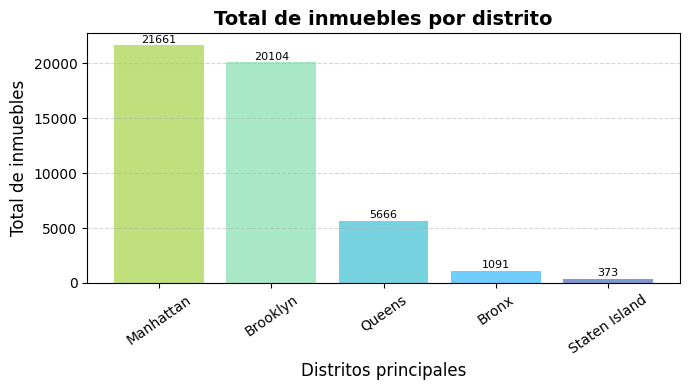

In [27]:
# Gráfico del detalle de inmuebles por distrito en el DataFrame

# Personalizar gráfico
plt.figure(figsize=(7, 4))
colors = ["#C0DF7D", "#A9E8C6", "#76D2DE", "#6FCEFD", "#7F97D3"][:len(conteo)]
bars = plt.bar(conteo.index, conteo.values, color=colors)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval),
             ha='center', va='bottom', fontsize=8)

# Personalizar etiquetas y estilo
plt.title("Total de inmuebles por distrito", fontsize=14, fontweight="bold")
plt.xlabel("Distritos principales", fontsize=12)
plt.ylabel("Total de inmuebles", fontsize=12)
plt.xticks(rotation=35)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Según el gráfico de "Total de inmuebles por distrito" se puede apreciar que, tanto Manhattan como Brooklyn tienen mayor oferta, mientras que Queens, el Bronx y Staten Island son los que por el contrario, su oferta disminuye abruptamente.

Text(0.5, 1.0, 'Distribución de inmuebles según distrito')

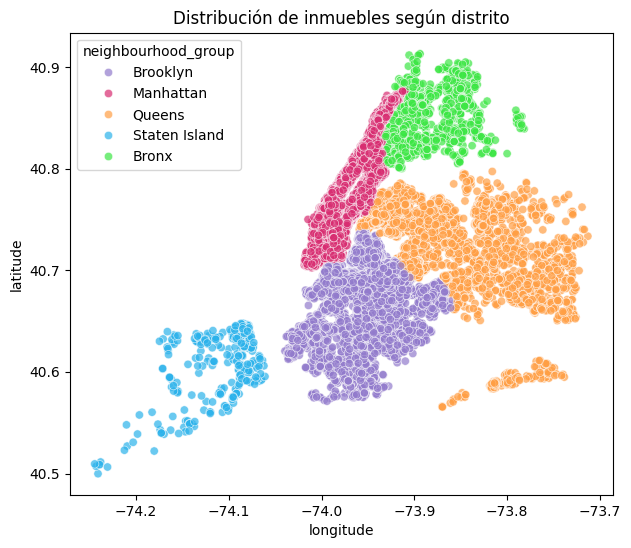

In [ ]:
#Distribución de inmuebles según distrito
plt.figure(figsize=(7,6))
colores = {"Manhattan": "#D82D71", "Brooklyn": "#927BCC", "Queens": "#FF9F45", "Bronx": "#3CE644","Staten Island": "#2BB2EB"}
sns.scatterplot(x="longitude", y="latitude", hue="neighbourhood_group", palette=colores, data=df, alpha=0.7)
plt.title("Distribución de inmuebles según distrito")

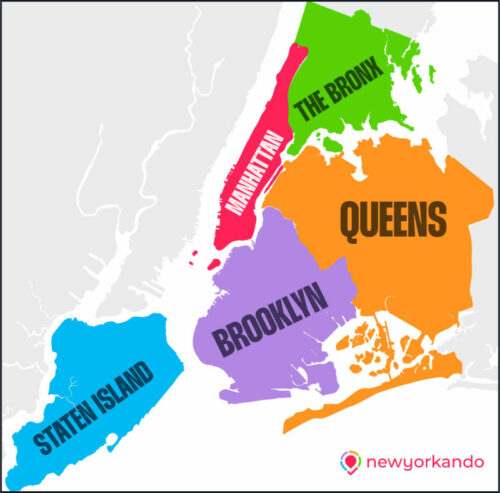

Como se puede ver en el gráifco anterior con este plano por distritos están muy bien delimitados los mismos...

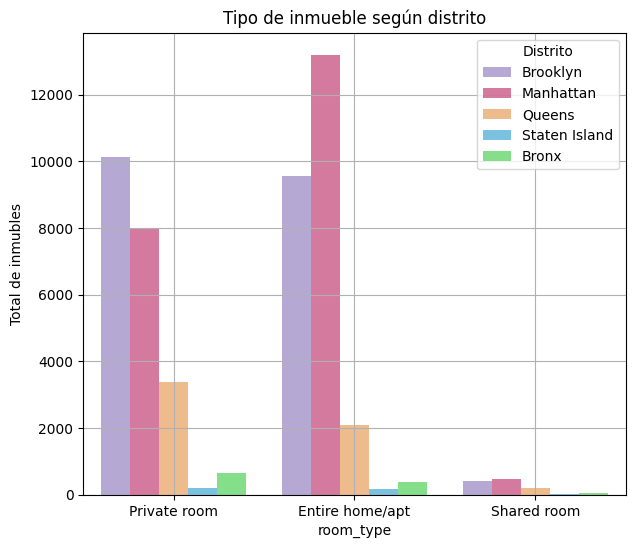

In [ ]:
#Gráfica por tipo de inmueble según distrito
plt.figure(figsize=(7,6))
colores = {"Manhattan": "#D82D71", "Brooklyn": "#927BCC", "Queens": "#FF9F45", "Bronx": "#3CE644","Staten Island": "#2BB2EB"}
sns.countplot(df, x = 'room_type', hue='neighbourhood_group', palette=colores, alpha = 0.7)
plt.title('Tipo de inmueble según distrito')
plt.ylabel('Total de inmubles')
plt.legend(title = 'Distrito')
plt.grid()
plt.show()

In [ ]:
# Detalle del precio de cada inmueble en el DataFrame
precio_inmu = df["price"].value_counts()
print(precio_inmu)

price
100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
1080       1
1299       1
1295       1
519        1
1978       1
Name: count, Length: 674, dtype: int64


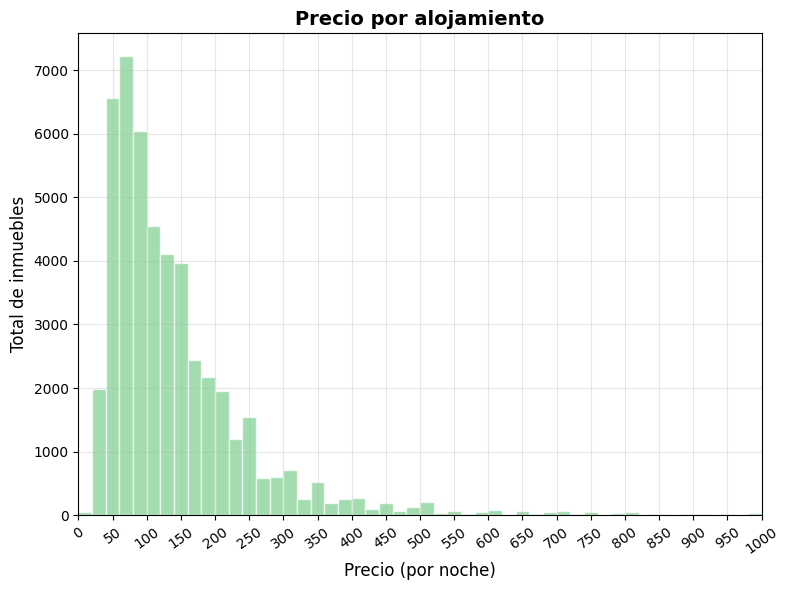

In [ ]:
# Histograma de precio por alojamiento en el DataFrame
plt.figure(figsize=(8,6))
plt.hist(df['price'], bins=500, edgecolor="white", alpha=0.7, color="#7CCF8E")
plt.title("Precio por alojamiento", fontsize=14, fontweight='bold')
plt.xlabel("Precio (por noche)", fontsize=12)
plt.ylabel("Total de inmuebles", fontsize=12)
plt.xticks(range(0, 1001, 50), rotation=35)
plt.xlim(0,1000)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Detalle del tipo de alquiler de cada inmueble del DataFrame
tipo_hab = df['room_type'].value_counts()
print(tipo_hab)

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


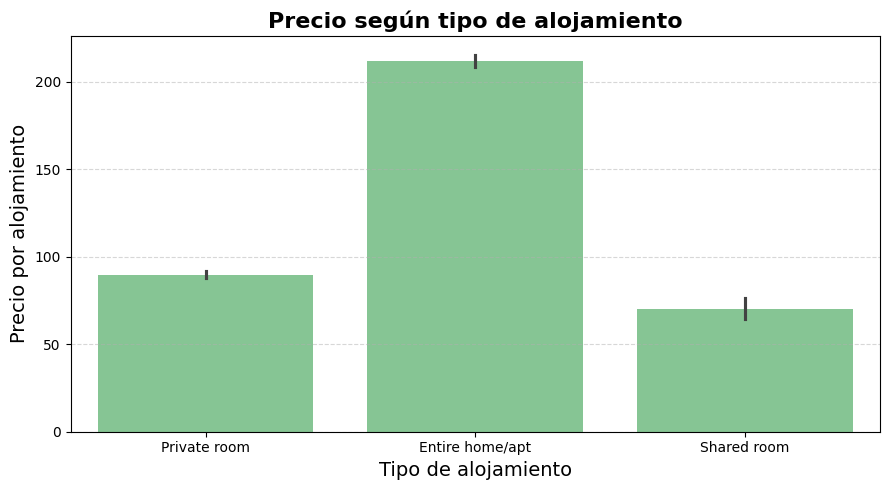

In [ ]:
# Gráfica de tipos de alojamientos por precio
fig, ax = plt.subplots(figsize=(9, 5)) 
sns.barplot(ax=ax, data = df, x = "room_type", y = "price", color="#7CCF8E")
ax.set_title("Precio según tipo de alojamiento", fontsize=16, fontweight="bold")
ax.set_xlabel("Tipo de alojamiento", fontsize=14)
ax.set_ylabel("Precio por alojamiento", fontsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
#Elimino columnas que no me son de interés del DataFrame
elim_columnas = ["id", "name", "host_name", "last_review", "calculated_host_listings_count"]
df.drop(elim_columnas, axis=1, inplace=True)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0


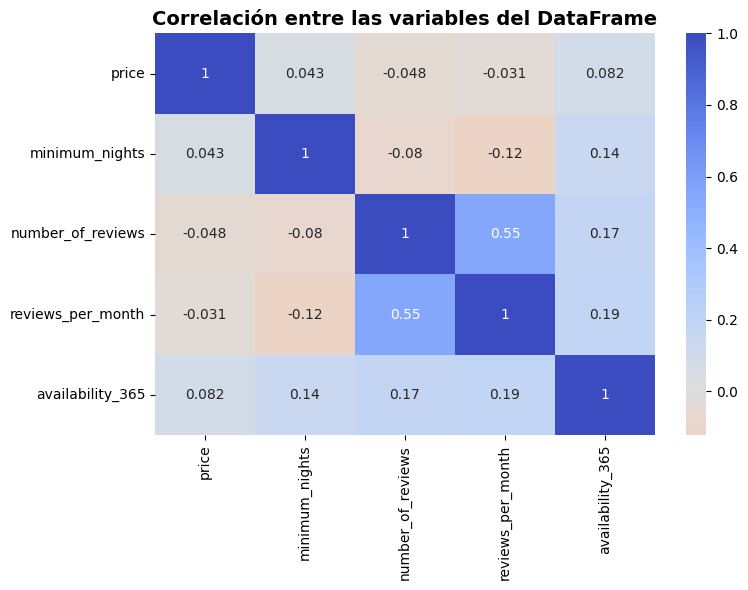

In [ ]:
#Mapa de calor para buscar correlaciones entre los datos

plt.figure(figsize=(8, 6))
numeric_cols = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "availability_365"]
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm_r', center=0)
plt.title("Correlación entre las variables del DataFrame", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

Según el mapa de calor hay muy poca relación entre los datos analiazados, siendo las únicas que tienen una relación estrecha al compartir naturaleza "reseñas por mes" y "número de reseñas".